# CIS 2300: New York City Motor Vehicle Collision Report Analysis

### Hypothesis


Our original aim in analyzing this dataset on collisions was centered around understanding the impact of the COVID-19 pandemic on traffic and collisions within New York City. Our hypothesis posited that the lockdown measures implemented in 2020 would lead to a notable decrease in collisions, with rates potentially returning to 2019 levels by 2021. However, the data presented a different story.

### Selecting Data

We begin by cleaning the data - dropping unnecessary values/ columns and duplicates. Additionally, we created a new dataframe which is sorted in ascending order to include only data from 2019-2021. This helps us target NYC crash data pre and post-COVID times, to help tailor our analysis to the affects Covid had on NYC Drivers. 

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Import the dataset 
df = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes_20240501.csv',low_memory=False)
# Columns stated below were unnecesary for intended assignment as they had missing or no data at all
df = df.drop(['CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
                'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4',
              'VEHICLE TYPE CODE 5'], axis=1).drop_duplicates()


df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE']) 

# Filter the DataFrame to include only years 2019, 2020, and 2021
filtered_df = df[df['CRASH DATE'].dt.year.isin([2019, 2020, 2021])]

# Sort the DataFrame by 'CRASH DATE' column in ascending order
sorted_df = filtered_df.sort_values(by='CRASH DATE', ascending=True)

sorted_df

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2
508417,2019-01-01,17:58,NaN,NaN,40.737118,-73.845180,"(40.737118, -73.84518)",GRAND CENTRAL PKWY,NaN,NaN,...,0,0,0,0,0,Passing or Lane Usage Improper,Unspecified,4060584,Sedan,Station Wagon/Sport Utility Vehicle
509600,2019-01-01,8:00,NaN,NaN,40.659110,-73.899220,"(40.65911, -73.89922)",NEW LOTS AVENUE,NaN,NaN,...,0,0,0,0,0,Unspecified,NaN,4060749,Station Wagon/Sport Utility Vehicle,NaN
509614,2019-01-01,23:39,BROOKLYN,11203,40.651733,-73.930390,"(40.651733, -73.93039)",UTICA AVENUE,CHURCH AVENUE,NaN,...,0,0,0,0,0,Passenger Distraction,Unspecified,4060819,Sedan,Sedan
509654,2019-01-01,20:17,BRONX,10466,40.890545,-73.840870,"(40.890545, -73.84087)",STRANG AVENUE,WILDER AVENUE,NaN,...,0,0,0,3,0,Traffic Control Disregarded,Unspecified,4060645,Sedan,Station Wagon/Sport Utility Vehicle
509655,2019-01-01,19:00,QUEENS,11368,40.738380,-73.854650,"(40.73838, -73.85465)",NaN,NaN,58-35 GRANGER STREET,...,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,4060730,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33600,2021-12-31,21:50,NaN,NaN,NaN,NaN,NaN,RANDALL AVENUE,CROSS BRONX EXPRESSWAY EXTENSION,NaN,...,0,0,0,0,0,Unspecified,NaN,4491450,Sedan,NaN
33596,2021-12-31,20:00,BRONX,10457,40.839330,-73.899040,"(40.83933, -73.89904)",EAST 172 STREET,FULTON AVENUE,NaN,...,0,0,0,0,0,Unspecified,Unspecified,4491439,Sedan,NaN
33790,2021-12-31,6:08,NaN,NaN,40.583447,-74.159935,"(40.583447, -74.159935)",NaN,NaN,51 WESTPORT STREET,...,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,4491046,Sedan,Sedan
37936,2021-12-31,0:30,NaN,NaN,40.785150,-73.940630,"(40.78515, -73.94063)",FDR DRIVE,NaN,NaN,...,0,0,0,0,0,Unsafe Speed,Other Vehicular,4491808,Station Wagon/Sport Utility Vehicle,Sedan


# Filter Functions

When dealing with extensive datasets, it is essential to emphasize the specific years that you want to use. Here, we have divided the data from 2016 to 2022 into a period of just three years. 2019 (before to the onset of the COVID-19 pandemic), 2020 (during the middle of the COVID-19 pandemic), and 2021 (after the COVID-19 pandemic).

In [2]:
# FILTER FUNCTION TO USE FOR YEARS
# create df for each year to avoid data overlapping between years


# Filter DataFrame for the year 2019
df2019 = df[df['CRASH DATE'].dt.year == 2019]

# Filter DataFrame for the year 2020
df2020 = df[df['CRASH DATE'].dt.year == 2020]

# Filter DataFrame for the year 2021
df2021 = df[df['CRASH DATE'].dt.year == 2021]


# Overview of Total Collisions in Boroughs Years 2019-2021

The general filtration and analysis of all 3 years of data aims to show a complete analysis of the data before it is we go deeper on a yearly basis.

In [3]:
# Return number of total accidents in each borough for whole general dataframe
borough_counts_total = df['BOROUGH'].value_counts()
total_collisions_general = sum(borough_counts_total)
# Print the results
print(borough_counts_total)
print('Total Collisions in years 2019-2021 is:',total_collisions_general)

BOROUGH
BROOKLYN         456830
QUEENS           384936
MANHATTAN        321249
BRONX            212328
STATEN ISLAND     60252
Name: count, dtype: int64
Total Collisions in years 2019-2021 is: 1435595


In [4]:
# Percentage returns for the amount of collisions in the years 2019-2021 per borough
df['BOROUGH'].value_counts(normalize=True)*100

BOROUGH
BROOKLYN         31.821649
QUEENS           26.813690
MANHATTAN        22.377411
BRONX            14.790244
STATEN ISLAND     4.197005
Name: proportion, dtype: float64

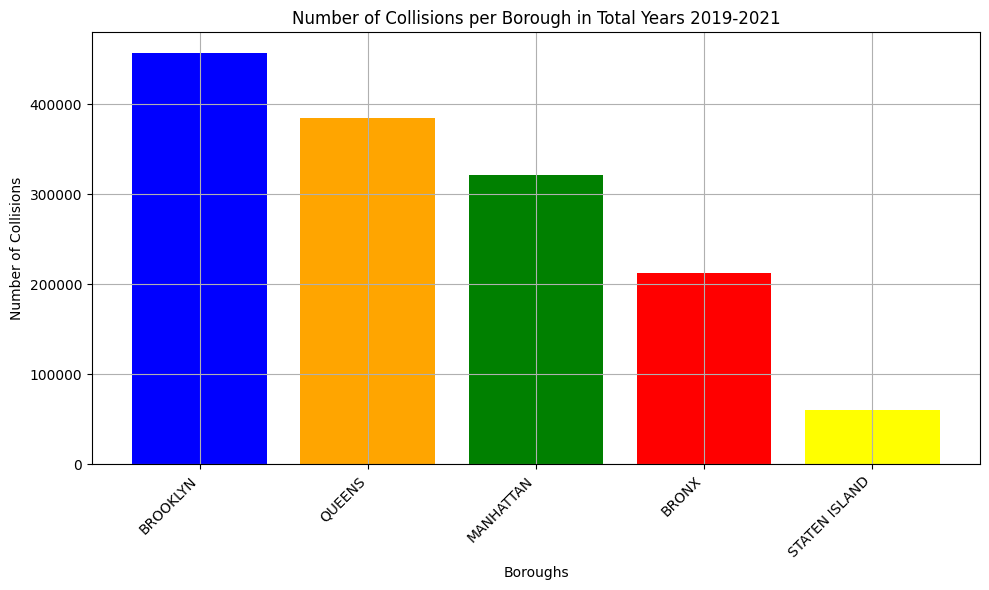

In [5]:
# Plotting the bar chart with specified colors for each borough
# Graph shows all general collison data per borough in years 2019-2021

# Define the colors for each borough with borough names
color_dict = {
    'BROOKLYN': 'blue',
    'QUEENS': 'orange',
    'MANHATTAN': 'green',
    'BRONX': 'red',
    'STATEN ISLAND': 'yellow'
}

# Get the counts of collisions for each borough
borough_collisions_general = df['BOROUGH'].value_counts()

# Plotting the bar chart with specified colors
plt.figure(figsize=(10, 6))  # Adjust figure size to fit labels
plt.bar(borough_collisions_general.index, borough_collisions_general, color=[color_dict[borough.upper()] 
        for borough in borough_collisions_general.index])

# Add titles and labels
plt.title('Number of Collisions per Borough in Total Years 2019-2021')
plt.xlabel('Boroughs')
plt.ylabel('Number of Collisions')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(True)

plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()




# Year Specific Borough Collision Statististics 

After analyzing the general collision data and it's statistics we will delve deeper into collisions in each of the boroughs by year. This is done to view the data a year before the COVID-19 pandemic(2019), a year in the peak of COVID-19 pandemic(2020), and a year after the COVID-19 pandemic(2021). These years were selected to show the possible effect the lockdown had on New York City Traffic and to tests whether there were any outliers.

2019 Borough Collisions

In [6]:
# Return number of total accidents in each borough for given year
borough_counts_2019 = df2019['BOROUGH'].value_counts()
total_collisions_2019 = sum(borough_counts_2019)
# Print the results
print(borough_counts_2019)
print('The total recorded collisions in 2019 is:',total_collisions_2019)

BOROUGH
BROOKLYN         44479
QUEENS           39865
MANHATTAN        26593
BRONX            22437
STATEN ISLAND     3650
Name: count, dtype: int64
The total recorded collisions in 2019 is: 137024


In [7]:
# Percentage returns for the amount of collisions in 2019 per borough
df2019['BOROUGH'].value_counts(normalize=True)*100

BOROUGH
BROOKLYN         32.460737
QUEENS           29.093443
MANHATTAN        19.407549
BRONX            16.374504
STATEN ISLAND     2.663767
Name: proportion, dtype: float64

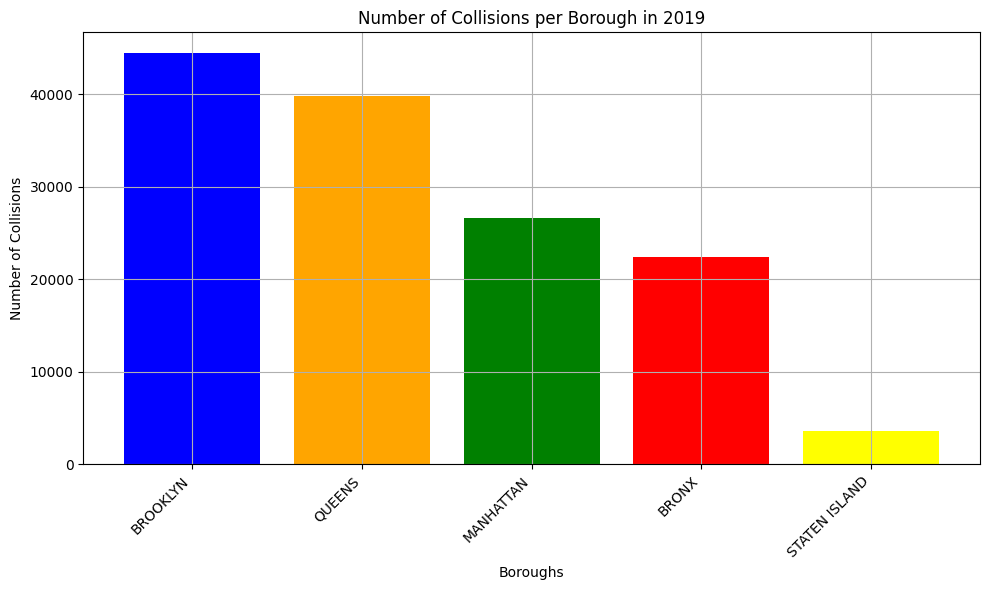

In [8]:
# Plotting the bar chart with specified colors for each borough
# Graphed to isolate only the collisons per borough in 2019


# Define the colors for each borough with borough names 
color_dict = {
    'BROOKLYN': 'blue',
    'QUEENS': 'orange',
    'MANHATTAN': 'green',
    'BRONX': 'red',
    'STATEN ISLAND': 'yellow'
}

# Get the counts of collisions for each borough in 2019
borough_collisions_2019 = df2019['BOROUGH'].value_counts()

# Plotting the bar chart with specified colors
plt.figure(figsize=(10, 6))  # Adjust figure size to fit labels
plt.bar(borough_collisions_2019.index, borough_collisions_2019, color=[color_dict[borough.upper()] 
        for borough in borough_collisions_2019.index])

# Add titles and labels
plt.title('Number of Collisions per Borough in 2019')
plt.xlabel('Boroughs')
plt.ylabel('Number of Collisions')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(True)

plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()





2020 Borough Collisions

In [9]:
# Return number of total accidents in each borough for given year
borough_counts_2020 = df2020['BOROUGH'].value_counts()
total_collisions_2020 = sum(borough_counts_2020)
# Print the results
print(borough_counts_2020)
print('The total recorded collisions in 2020 is:',total_collisions_2020)

BOROUGH
BROOKLYN         25472
QUEENS           20667
BRONX            14306
MANHATTAN        10855
STATEN ISLAND     2388
Name: count, dtype: int64
The total recorded collisions in 2020 is: 73688


In [ ]:
# Percentage returns for the amount of collisions in 2020 per borough
df2020['BOROUGH'].value_counts(normalize=True)*100

BOROUGH
BROOKLYN         34.567365
QUEENS           28.046629
BRONX            19.414287
MANHATTAN        14.731028
STATEN ISLAND     3.240690
Name: proportion, dtype: float64

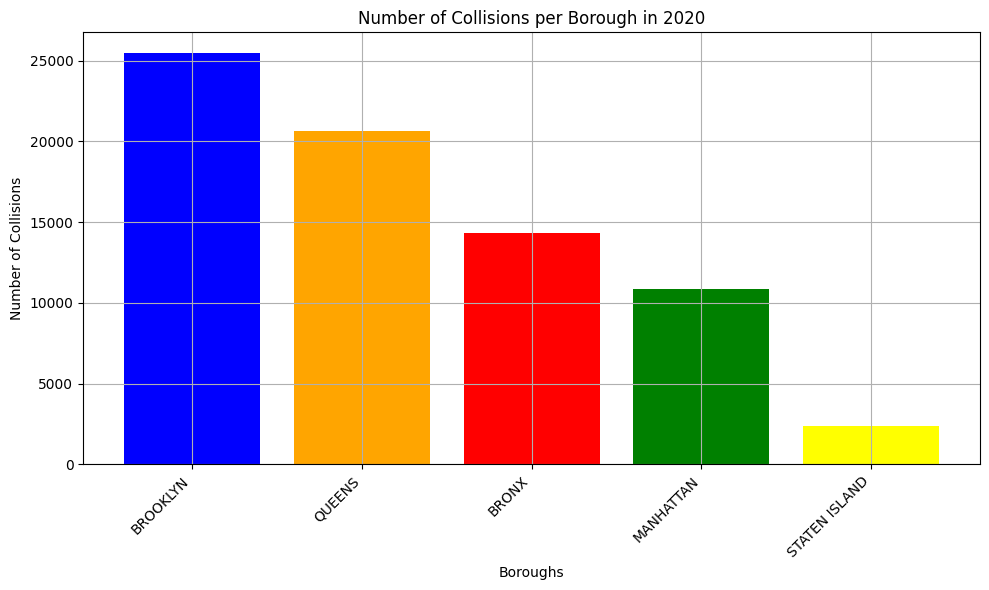

In [ ]:
# Plotting the bar chart with specified colors for each borough
# Graphed to isolate only the collisons per borough in 2020

# Define the colors for each borough with borough names 
color_dict = {
    'BROOKLYN': 'blue',
    'QUEENS': 'orange',
    'MANHATTAN': 'green',
    'BRONX': 'red',
    'STATEN ISLAND': 'yellow'
}

# Get the counts of collisions for each borough in 2020
borough_collisions_2020 = df2020['BOROUGH'].value_counts()

# Plotting the bar chart with specified colors
plt.figure(figsize=(10, 6))  # Adjust figure size to fit labels
plt.bar(borough_collisions_2020.index, borough_collisions_2020, color=[color_dict[borough.upper()] 
        for borough in borough_collisions_2020.index])

# Add titles and labels
plt.title('Number of Collisions per Borough in 2020')
plt.xlabel('Boroughs')
plt.ylabel('Number of Collisions')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(True)

plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()





In [ ]:
borough_counts_2021 = df2021['BOROUGH'].value_counts()
total_collisions_2021 = sum(borough_counts_2021)
# Print the results
print(borough_counts_2019)
print('The total recorded collisions in 2021 is:',total_collisions_2021)

BOROUGH
BROOKLYN         44479
QUEENS           39865
MANHATTAN        26593
BRONX            22437
STATEN ISLAND     3650
Name: count, dtype: int64
The total recorded collisions in 2021 is: 72217


2021 Borough Collisions

In [ ]:
# Percentage returns for the amount of collisions in 2021 per borough
df2021['BOROUGH'].value_counts(normalize=True)*100

BOROUGH
BROOKLYN         34.854674
QUEENS           27.087805
BRONX            18.539956
MANHATTAN        15.827298
STATEN ISLAND     3.690267
Name: proportion, dtype: float64

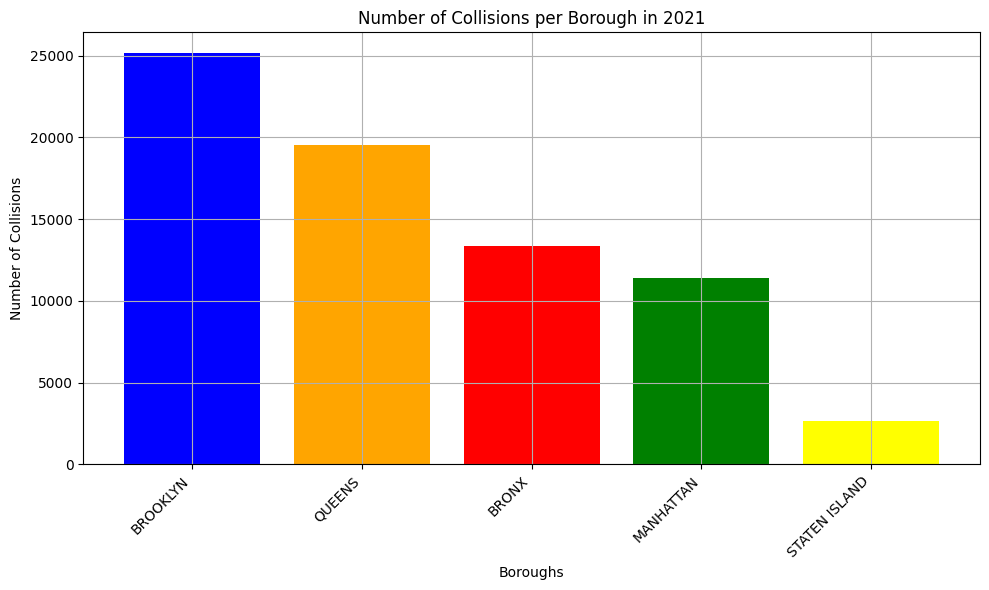

In [ ]:
# Plotting the bar chart with specified colors for each borough
# Graphed to Isolate only the collisons per borough in 2021

# Define the colors for each borough with borough names 
color_dict = {
    'BROOKLYN': 'blue',
    'QUEENS': 'orange',
    'MANHATTAN': 'green',
    'BRONX': 'red',
    'STATEN ISLAND': 'yellow'
}

# Get the counts of collisions for each borough in 2021
borough_collisions_2021 = df2021['BOROUGH'].value_counts()

# Plotting the bar chart with specified colors
plt.figure(figsize=(10, 6))  # Adjust figure size to fit labels
plt.bar(borough_collisions_2021.index, borough_collisions_2021, color=[color_dict[borough.upper()] 
        for borough in borough_collisions_2021.index])

# Add titles and labels
plt.title('Number of Collisions per Borough in 2021')
plt.xlabel('Boroughs')
plt.ylabel('Number of Collisions')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(True)

plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


# Victim Demographics: 

Here we begin examining data on who our victims were, and whether they were injured or killed. The data below shows the exact count of victim injury and death incidents in 2019-2021, followed by a bar chart to help visualize our reporting. 

In [ ]:
 # Filter to only include data from 2019
Year_2019 = df2019[['NUMBER OF PERSONS KILLED', 'NUMBER OF PERSONS INJURED', 
                    'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 
                    'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED']].sum()

# Display the sums as a list
print("Total Persons Injured and Killed by Category in 2019:")
print(Year_2019)


Total Persons Injured and Killed by Category in 2019:
NUMBER OF PERSONS KILLED        244.0
NUMBER OF PERSONS INJURED     61389.0
NUMBER OF CYCLIST INJURED      4986.0
NUMBER OF CYCLIST KILLED         31.0
NUMBER OF MOTORIST INJURED    45834.0
NUMBER OF MOTORIST KILLED        82.0
dtype: float64


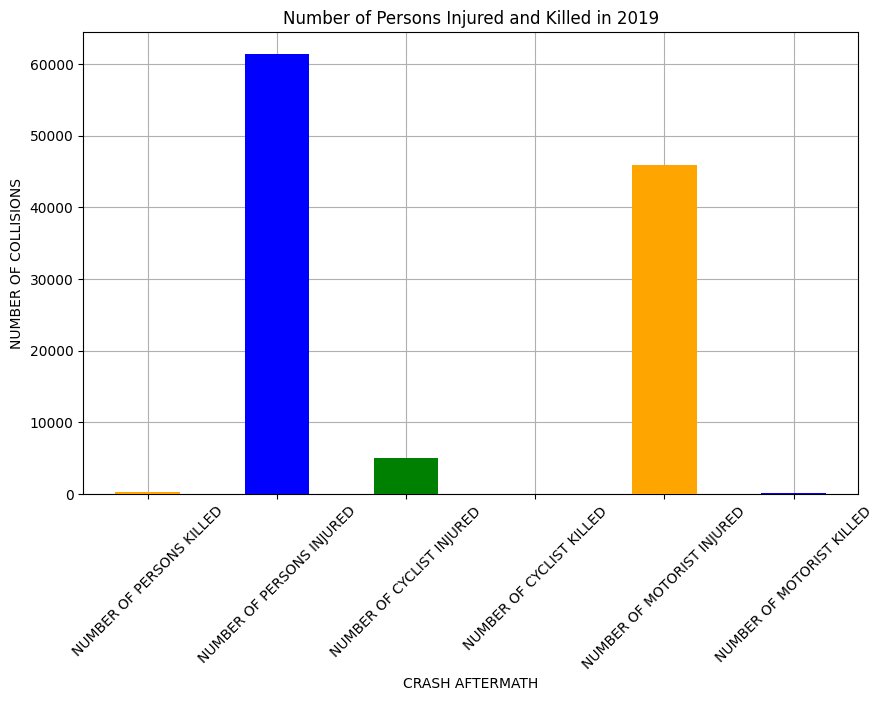

In [ ]:
 # Filter to only include data from 2019
Year_2019 = df2019[['NUMBER OF PERSONS KILLED', 'NUMBER OF PERSONS INJURED', 
                    'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 
                    'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED']].sum()

# Plotting the bar chart with specific colors 
plt.figure(figsize=(10, 6))
colors = [ 'orange', 'blue' , 'green', 'red']
Year_2019.plot.bar(color=colors, zorder=3) 

# Add titles and labels 
plt.title('Number of Persons Injured and Killed in 2019')
plt.xlabel('CRASH AFTERMATH')
plt.ylabel('NUMBER OF COLLISIONS')

#Rotates x-axis labels for better readability 
plt.xticks(rotation=45)

plt.grid(True)

plt.show()

In [ ]:
# Victim Demographics 

# Filter to only include data from 2020
Year_2020 = df2020[['NUMBER OF PERSONS KILLED', 'NUMBER OF PERSONS INJURED', 
                    'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 
                    'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED']].sum()

# Display the sums as a list
print("Total Persons Injured and Killed by Category in 2020:")
print(Year_2020)

Total Persons Injured and Killed by Category in 2020:
NUMBER OF PERSONS KILLED        269.0
NUMBER OF PERSONS INJURED     44614.0
NUMBER OF CYCLIST INJURED      5576.0
NUMBER OF CYCLIST KILLED         29.0
NUMBER OF MOTORIST INJURED    32347.0
NUMBER OF MOTORIST KILLED       139.0
dtype: float64


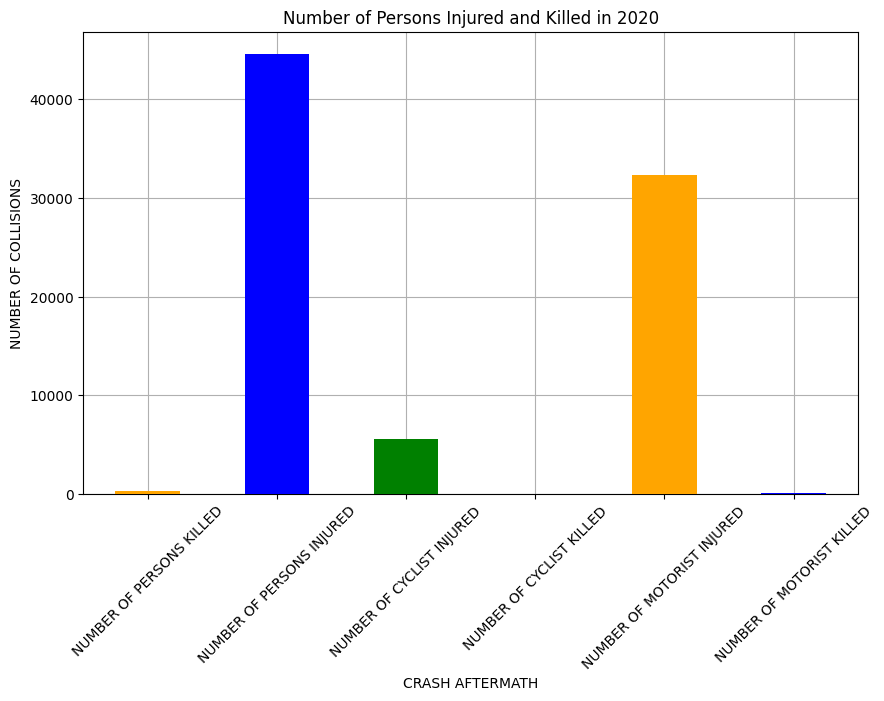

In [ ]:
# Victim Demographics 

# Filter to only include data from 2020
Year_2020 = df2020[['NUMBER OF PERSONS KILLED', 'NUMBER OF PERSONS INJURED', 
                    'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 
                    'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED']].sum()

# Plotting the bar chart with specific colors 
plt.figure(figsize=(10, 6))
colors = [ 'orange', 'blue' , 'green', 'red']
Year_2020.plot.bar(color=colors, zorder=3) 

# Add titles and labels
plt.title('Number of Persons Injured and Killed in 2020')
plt.xlabel('CRASH AFTERMATH')
plt.ylabel('NUMBER OF COLLISIONS')
plt.grid(True)

#Rotates x-axis labels for better readability 
plt.xticks(rotation=45)


plt.show()

In [ ]:
# Victim Demographics 

# Filter to only include data from 2021
Year_2021 = df2021[['NUMBER OF PERSONS KILLED', 'NUMBER OF PERSONS INJURED', 
                    'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 
                    'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED']].sum()

# Display the sums as a list
print("Total Persons Injured and Killed by Category in 2021:")
print(Year_2021)

Total Persons Injured and Killed by Category in 2021:
NUMBER OF PERSONS KILLED        296.0
NUMBER OF PERSONS INJURED     51781.0
NUMBER OF CYCLIST INJURED      4961.0
NUMBER OF CYCLIST KILLED         19.0
NUMBER OF MOTORIST INJURED    37187.0
NUMBER OF MOTORIST KILLED       134.0
dtype: float64


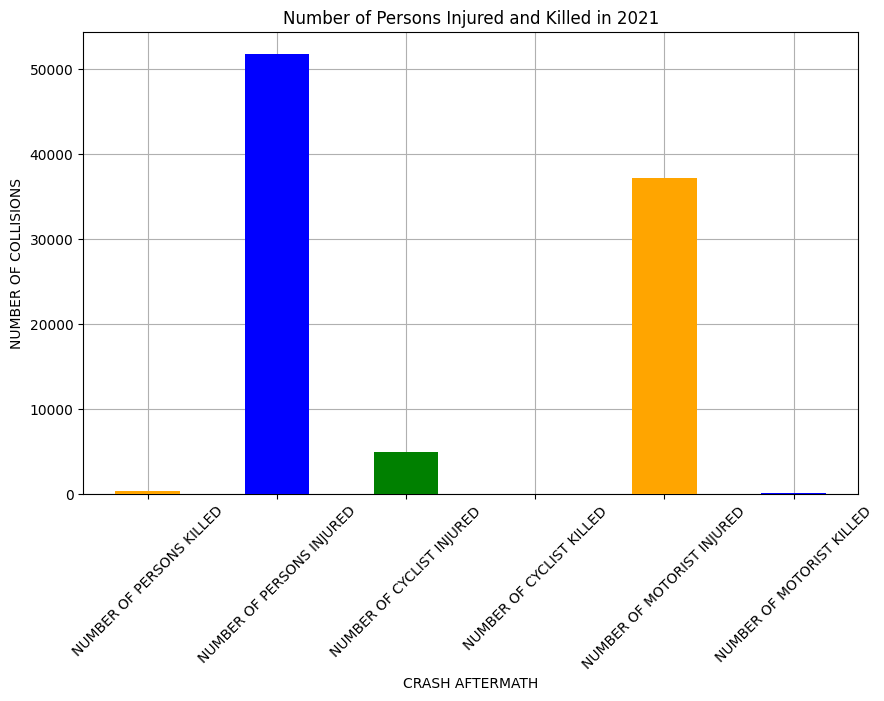

In [ ]:
# Victim Demographics 

# Filter to only include data from 2021
Year_2021 = df2021[['NUMBER OF PERSONS KILLED', 'NUMBER OF PERSONS INJURED', 
                    'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 
                    'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED']].sum()

# Plotting the bar chart with specific colors
plt.figure(figsize=(10, 6))
colors = [ 'orange', 'blue' , 'green', 'red']
Year_2021.plot.bar(color=colors, zorder=3) 

# Add titles and labels
plt.title('Number of Persons Injured and Killed in 2021')
plt.xlabel('CRASH AFTERMATH')
plt.ylabel('NUMBER OF COLLISIONS')
plt.grid(True)
colors = ['blue', 'orange', 'green', 'red', 'yellow']

#Rotates x-axis labels for better readability 
plt.xticks(rotation=45)

plt.show()

# Time Analysis: 

 After gathering the data from each individual year, we compare how the number of collisions and the number of people injured or killed has changed throughout our timeline. 


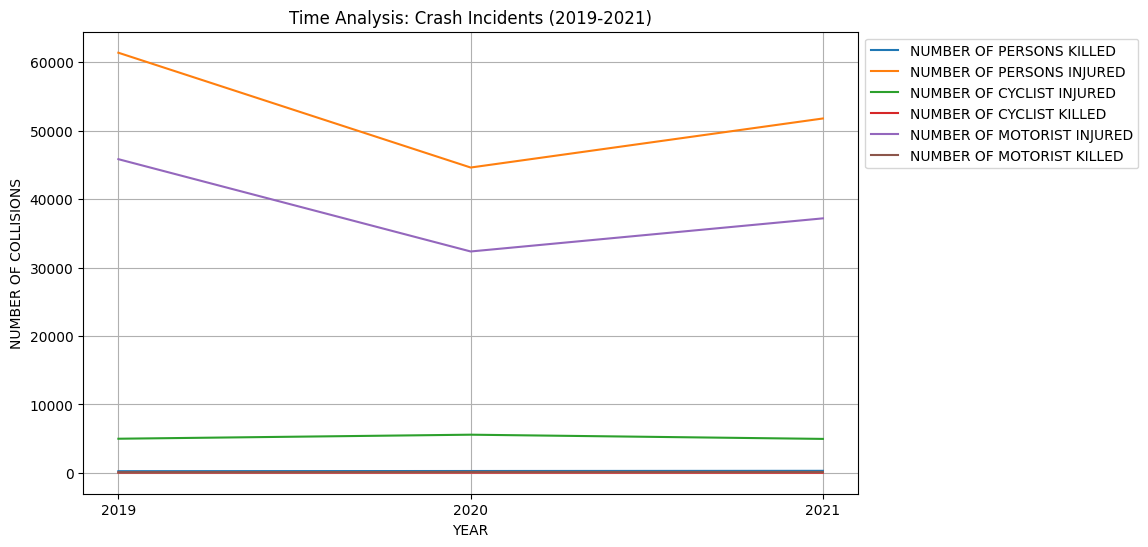

In [ ]:
# Time Analysis 

# Data for each year
years = [2019, 2020, 2021]
categories = ['NUMBER OF PERSONS KILLED', 'NUMBER OF PERSONS INJURED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED']

# Filter to include all data from 2019-2021
Year_2019 = df2019[['NUMBER OF PERSONS KILLED', 'NUMBER OF PERSONS INJURED', 
                    'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 
                    'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED']].sum()
Year_2020 = df2020[['NUMBER OF PERSONS KILLED', 'NUMBER OF PERSONS INJURED', 
                    'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 
                    'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED']].sum()
Year_2021 = df2021[['NUMBER OF PERSONS KILLED', 'NUMBER OF PERSONS INJURED', 
                    'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 
                    'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED']].sum()

# Plotting
plt.figure(figsize=(10, 6))  # Adjust figure size if needed

for category in categories:
    plt.plot(years, [Year_2019[category], Year_2020[category], Year_2021[category]], label=category)

#Adds titles and labels
plt.title('Time Analysis: Crash Incidents (2019-2021)')
plt.xlabel('YEAR')
plt.ylabel('NUMBER OF COLLISIONS')
plt.xticks(years)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


# Crash Time Data

Let's examine the precise moments when accidents occurred at their maximum frequency and see whether there are any variations over the years.

Starting off with 2019

/tmp/ipykernel_1438/3761361414.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df2019['CRASH TIME'] = pd.to_datetime(df2019['CRASH TIME'])
/tmp/ipykernel_1438/3761361414.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2019['CRASH TIME'] = pd.to_datetime(df2019['CRASH TIME'])
/tmp/ipykernel_1438/3761361414.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2

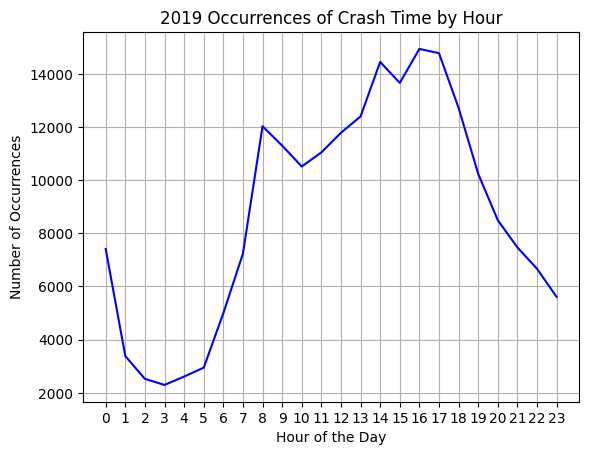

In [ ]:
df2019['CRASH TIME'] = pd.to_datetime(df2019['CRASH TIME'])

# Extract hour from 'CRASH TIME' and create a new column
df2019['CRASH HOUR'] = df2019['CRASH TIME'].dt.hour

# Count the occurrences of each hour
hourly_counts = df2019['CRASH HOUR'].value_counts().sort_index()

# Plotting the bar graph for 'CRASH HOUR'
hourly_counts.plot.line(color='blue')  # Using skyblue color for bars
plt.title('2019 Occurrences of Crash Time by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Occurrences')
plt.grid(True)

plt.xticks(range(24))

plt.show()

Data for 2020

/tmp/ipykernel_1438/19769694.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df2020['CRASH TIME'] = pd.to_datetime(df2020['CRASH TIME'])
/tmp/ipykernel_1438/19769694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2020['CRASH TIME'] = pd.to_datetime(df2020['CRASH TIME'])
/tmp/ipykernel_1438/19769694.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2020['C

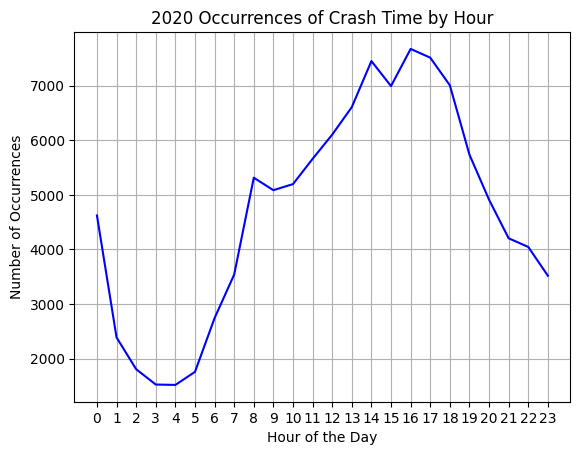

In [ ]:
df2020['CRASH TIME'] = pd.to_datetime(df2020['CRASH TIME'])

# Extract hour from 'CRASH TIME' and create a new column
df2020['CRASH HOUR'] = df2020['CRASH TIME'].dt.hour

# Count the occurrences of each hour
hourly_counts = df2020['CRASH HOUR'].value_counts().sort_index()

# Plotting the bar graph for 'CRASH HOUR'
hourly_counts.plot.line(color='blue')  # Using skyblue color for bars
plt.title('2020 Occurrences of Crash Time by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Occurrences')
plt.grid(True)

plt.xticks(range(24))

plt.show()

Data for 2021

/tmp/ipykernel_1438/2052750189.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df2021['CRASH TIME'] = pd.to_datetime(df2021['CRASH TIME'])
/tmp/ipykernel_1438/2052750189.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2021['CRASH TIME'] = pd.to_datetime(df2021['CRASH TIME'])
/tmp/ipykernel_1438/2052750189.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2

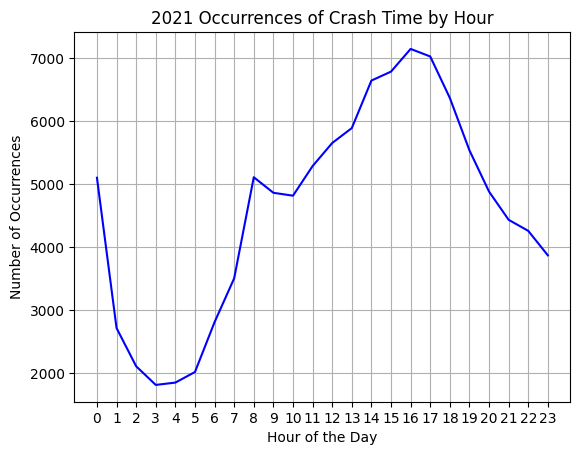

In [ ]:
df2021['CRASH TIME'] = pd.to_datetime(df2021['CRASH TIME'])

# Extract hour from 'CRASH TIME' and create a new column
df2021['CRASH HOUR'] = df2021['CRASH TIME'].dt.hour

# Count the occurrences of each hour
hourly_counts = df2021['CRASH HOUR'].value_counts().sort_index()

# Plotting the bar graph for 'CRASH HOUR'
hourly_counts.plot.line(color='blue')  # Using skyblue color for bars
plt.title('2021 Occurrences of Crash Time by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Occurrences')
plt.grid(True)

plt.xticks(range(24))

plt.show()

Upon first inspection, the data seems to be mostly normal. Upon careful examination, one may see a noticeable increase in the number of collisions in 2019 compared to previous years. 

The peak value in 2019 was 14000, however in 2020 and 2021 it decreased by half, settling at 7000. It is intriguing to see the correlation between the time of day and the severity of the accidents. 

Based on the data, it seems that the period between 4pm (16:00 in military time) has the greatest probability of crashes occurring, while the period around 3am(3:00 military time) has the lowest probability of collisions.

# Vehicle Crash Type

Let's begin by analyzing the vehicles types involved in these collisions from years 2019, 2020 and 2021

Firstly we analyzed the data for 2019 and organized the data into a bar graph:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes_20240501.csv', low_memory=False)


# Convert 'CRASH DATE' to datetime
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])

# Filter the DataFrame for the year 2019
df_2019 = df[df['CRASH DATE'].dt.year == 2019]

# Group by 'VEHICLE TYPE CODE 1' and count occurrences
vehicle_counts_2019 = df_2019['VEHICLE TYPE CODE 1'].value_counts()

# Print the results
print(vehicle_counts_2019)

VEHICLE TYPE CODE 1
Sedan                                  94667
Station Wagon/Sport Utility Vehicle    79847
Taxi                                    9823
Pick-up Truck                           6278
Box Truck                               4220
                                       ...  
City                                       1
35 FT                                      1
GOLF                                       1
UT                                         1
MAC T                                      1
Name: count, Length: 383, dtype: int64


/tmp/ipykernel_1438/296237512.py:5: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes_20240501.csv')


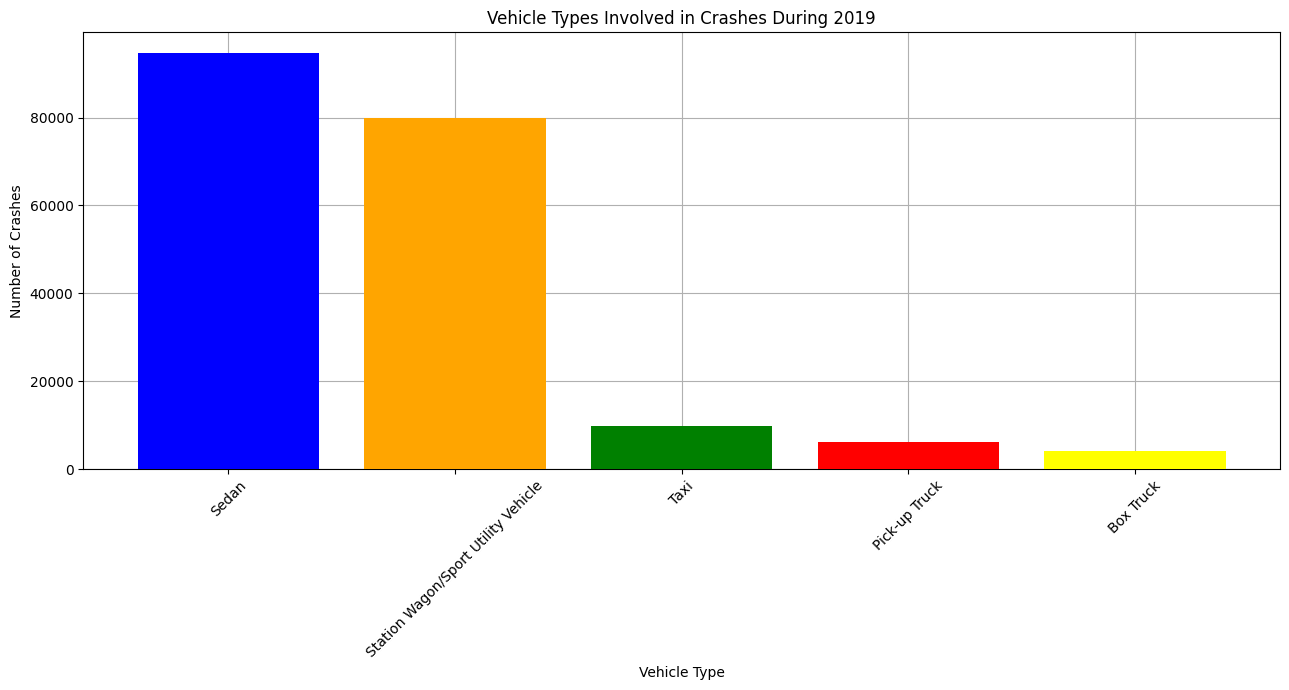

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes_20240501.csv')
# Convert 'CRASH DATE' to datetime
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])

# Filter the DataFrame for the year 2019
df_2019 = df[df['CRASH DATE'].dt.year == 2019]

# Group by 'VEHICLE TYPE CODE 1' and count occurrences
vehicle_counts_2019 = df_2019['VEHICLE TYPE CODE 1'].value_counts()

# Prepare data for plotting
vehicles = ['Sedan', 'Station Wagon/Sport Utility Vehicle', 'Taxi', 'Pick-up Truck', 'Box Truck']
counts = [94667, 79847, 9823, 6278, 4220]
colors = ['blue', 'orange', 'green', 'red', 'yellow']

# bar plot
plt.figure(figsize=(13, 7))
plt.bar(vehicles, counts, color=colors, zorder=3)
plt.title('Vehicle Types Involved in Crashes During 2019')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Crashes')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout() 

# Show the plot
plt.show()


Data for 2020

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes_20240501.csv', low_memory=False)

# Convert 'CRASH DATE' to datetime
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])

# Filter the DataFrame for 2020
df_2020 = df[df['CRASH DATE'].dt.year == 2020]

vehicle_counts_2020 = df_2020['VEHICLE TYPE CODE 1'].value_counts()

# Print the results
print(vehicle_counts_2020)

VEHICLE TYPE CODE 1
Sedan                                  52784
Station Wagon/Sport Utility Vehicle    40729
Taxi                                    3771
Pick-up Truck                           2680
Box Truck                               2047
                                       ...  
almbulance                                 1
dark color                                 1
Work Van                                   1
ford van                                   1
TANK                                       1
Name: count, Length: 385, dtype: int64


/tmp/ipykernel_1438/208365127.py:5: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes_20240501.csv')


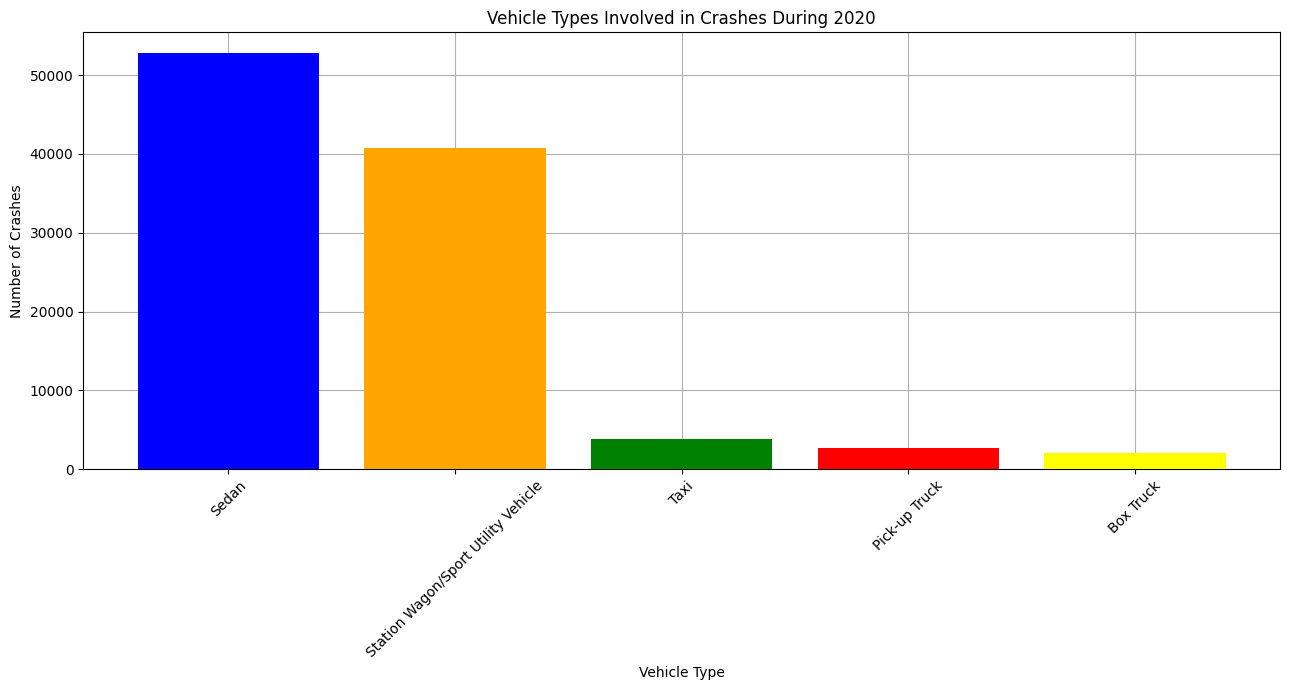

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes_20240501.csv')
# Convert 'CRASH DATE' to datetime
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])

df_2020 = df[df['CRASH DATE'].dt.year == 2020]

# Group by 'VEHICLE TYPE CODE 1' and count occurrences
vehicle_counts_2020 = df_2020['VEHICLE TYPE CODE 1'].value_counts()

# Prepare data for plotting
vehicles = ['Sedan', 'Station Wagon/Sport Utility Vehicle', 'Taxi', 'Pick-up Truck', 'Box Truck']
counts = [52784, 40729, 3771, 2680, 2047]
colors = ['blue', 'orange', 'green', 'red', 'yellow']

# bar plot
plt.figure(figsize=(13, 7))
plt.bar(vehicles, counts, color=colors, zorder= 3)
plt.title('Vehicle Types Involved in Crashes During 2020')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Crashes')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout() 

# Show the plot
plt.show()

Data for 2021

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes_20240501.csv', low_memory=False)

# Convert 'CRASH DATE' to datetime
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])

df_2021 = df[df['CRASH DATE'].dt.year == 2021]

vehicle_counts_2021 = df_2021['VEHICLE TYPE CODE 1'].value_counts()

# Print the results
print(vehicle_counts_2021)

VEHICLE TYPE CODE 1
Sedan                                  52440
Station Wagon/Sport Utility Vehicle    38748
Taxi                                    2748
Pick-up Truck                           2266
Box Truck                               1905
                                       ...  
White Van                                  1
Dent and S                                 1
''lime mope                                1
Pick wh                                    1
SNOW PLOW                                  1
Name: count, Length: 361, dtype: int64


/tmp/ipykernel_1438/533615475.py:5: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes_20240501.csv')


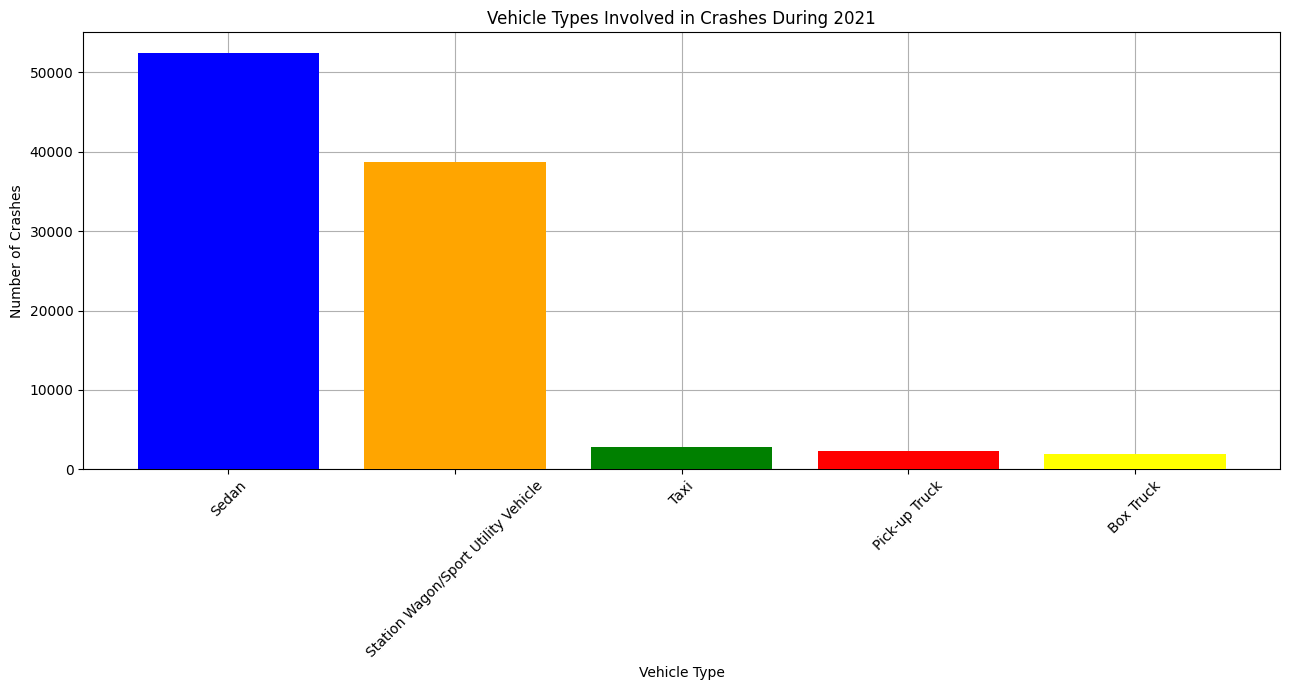

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes_20240501.csv')
# Convert 'CRASH DATE' to datetime
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])

df_2021 = df[df['CRASH DATE'].dt.year == 2021]

vehicle_counts_2021 = df_2021['VEHICLE TYPE CODE 1'].value_counts()

# Prepare data for plotting
vehicles = ['Sedan', 'Station Wagon/Sport Utility Vehicle', 'Taxi', 'Pick-up Truck', 'Box Truck']
counts = [52440, 38748, 2748, 2266, 1905]
colors = ['blue', 'orange', 'green', 'red', 'yellow']

# bar plot
plt.figure(figsize=(13, 7))
plt.bar(vehicles, counts, color=colors, zorder=3)
plt.title('Vehicle Types Involved in Crashes During 2021')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Crashes')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout() 

# Show the plot
plt.show()

This data comes from the 'vehicle type code 2' section. Based off this data, theres a notable decrease in vehicle collisions, when compared to 'Vehicle type code 1' data.

Data for 2019

In [ ]:
#Vehicle type 2 data

import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes_20240501.csv', low_memory=False)


# Convert 'CRASH DATE' to datetime
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])

# Filter the DataFrame for the year 2019
df_2019 = df[df['CRASH DATE'].dt.year == 2019]

# Group by 'VEHICLE TYPE CODE 1' and count occurrences
vehicle_counts_2019 = df_2019['VEHICLE TYPE CODE 2'].value_counts()

# Print the results
print(vehicle_counts_2019)



VEHICLE TYPE CODE 2
Sedan                                  69640
Station Wagon/Sport Utility Vehicle    61490
Taxi                                    7405
Pick-up Truck                           6078
Box Truck                               5058
                                       ...  
MAIL                                       1
E250                                       1
BUMP                                       1
Train                                      1
Log                                        1
Name: count, Length: 442, dtype: int64


/tmp/ipykernel_1438/3998683175.py:6: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes_20240501.csv')


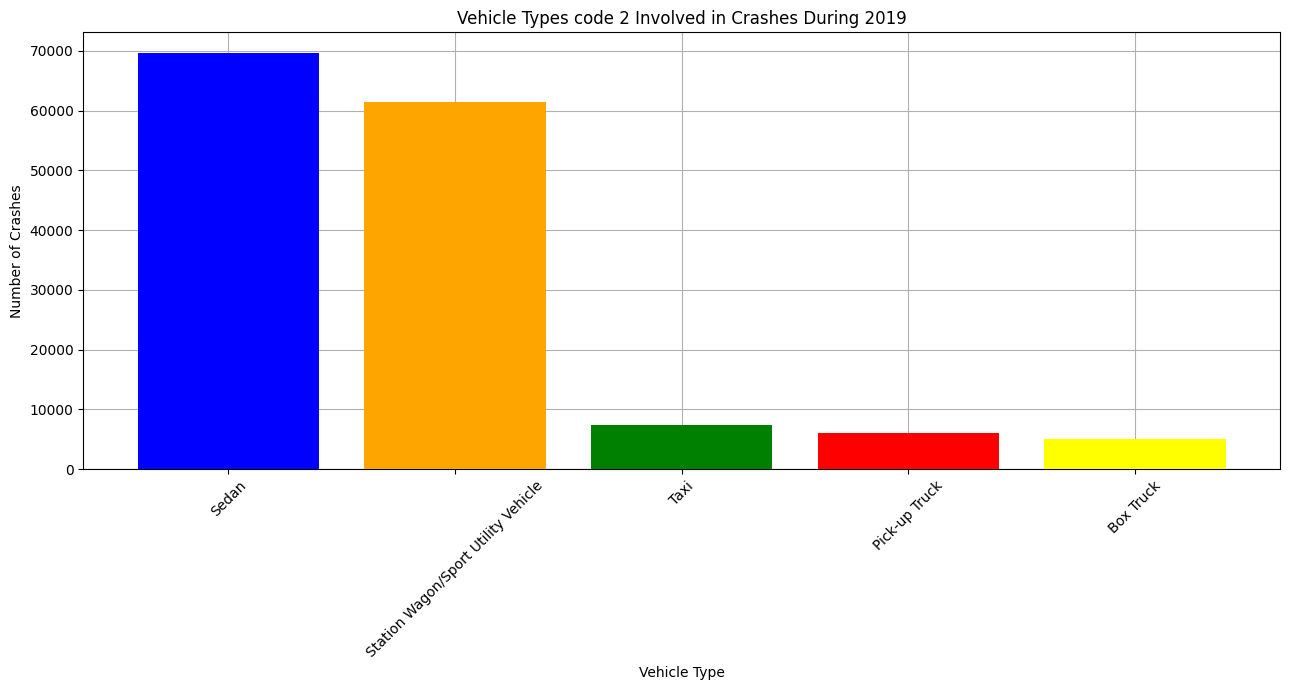

In [ ]:
#Vehicle type 2 data
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes_20240501.csv')
# Convert 'CRASH DATE' to datetime
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])

df_2019 = df[df['CRASH DATE'].dt.year == 2019]

vehicle_counts_2019 = df_2019['VEHICLE TYPE CODE 2'].value_counts()

# Prepare data for plotting
vehicles = ['Sedan', 'Station Wagon/Sport Utility Vehicle', 'Taxi', 'Pick-up Truck', 'Box Truck']
counts = [69640, 61490, 7405, 6078, 5058]
colors = ['blue', 'orange', 'green', 'red', 'yellow']

# bar plot
plt.figure(figsize=(13, 7))
plt.bar(vehicles, counts, color=colors, zorder=3)
plt.title('Vehicle Types code 2 Involved in Crashes During 2019')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Crashes')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout() 

# Show the plot
plt.show()

Data for 2020

In [ ]:
#Vehicle type 2 data

import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes_20240501.csv', low_memory=False)


# Convert 'CRASH DATE' to datetime
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])

# Filter the DataFrame for the year 2020
df_2020 = df[df['CRASH DATE'].dt.year == 2020]

# Group by 'VEHICLE TYPE CODE 1' and count occurrences
vehicle_counts_2020 = df_2020['VEHICLE TYPE CODE 2'].value_counts()

# Print the results
print(vehicle_counts_2020)

VEHICLE TYPE CODE 2
Sedan                                  34108
Station Wagon/Sport Utility Vehicle    26291
Bike                                    3795
Box Truck                               2248
Pick-up Truck                           2138
                                       ...  
DIRTBIKE                                   1
DELIVERY T                                 1
MOPED SCOO                                 1
motorbike                                  1
crane                                      1
Name: count, Length: 396, dtype: int64


/tmp/ipykernel_1438/785075786.py:6: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes_20240501.csv')


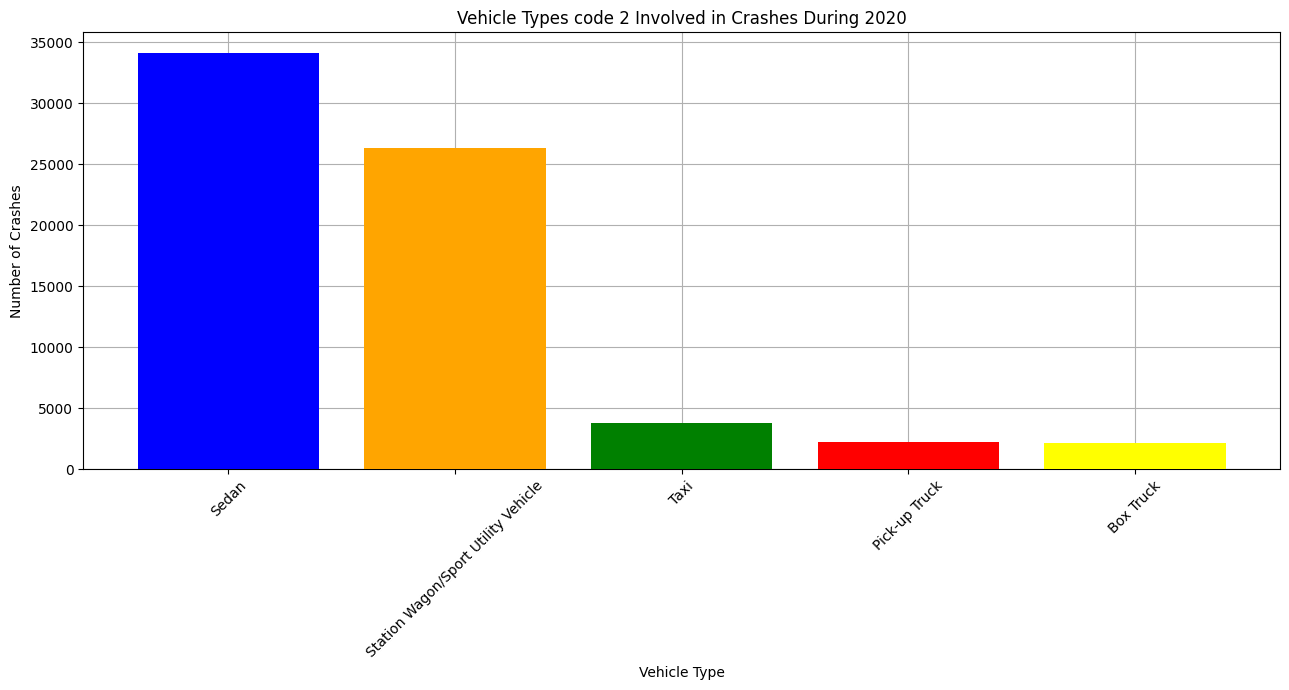

In [ ]:
#Vehicle type 2 data
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes_20240501.csv')
# Convert 'CRASH DATE' to datetime
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])

df_2020 = df[df['CRASH DATE'].dt.year == 2020]

vehicle_counts_2020 = df_2020['VEHICLE TYPE CODE 2'].value_counts()

# Prepare data for plotting
vehicles = ['Sedan', 'Station Wagon/Sport Utility Vehicle', 'Taxi', 'Pick-up Truck', 'Box Truck']
counts = [34108, 26291, 3795, 2248, 2138]
colors = ['blue', 'orange', 'green', 'red', 'yellow']

# bar plot
plt.figure(figsize=(13, 7))
plt.bar(vehicles, counts, color=colors, zorder=3)
plt.title('Vehicle Types code 2 Involved in Crashes During 2020')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Crashes')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout() 

# Show the plot
plt.show()

Data for 2021

In [ ]:
#Vehicle type 2 data for 2021

import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes_20240501.csv', low_memory=False)


# Convert 'CRASH DATE' to datetime
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])

# Filter the DataFrame for the year 2020
df_2021 = df[df['CRASH DATE'].dt.year == 2021]

# Group by 'VEHICLE TYPE CODE 1' and count occurrences
vehicle_counts_2021 = df_2021['VEHICLE TYPE CODE 2'].value_counts()

# Print the results
print(vehicle_counts_2021)

VEHICLE TYPE CODE 2
Sedan                                  32141
Station Wagon/Sport Utility Vehicle    22777
Bike                                    3626
Box Truck                               2256
E-Bike                                  1744
                                       ...  
SUBURBAN                                   1
scooter ga                                 1
Sprinter                                   1
F550                                       1
Motor Scoo                                 1
Name: count, Length: 421, dtype: int64


/tmp/ipykernel_1438/717959103.py:6: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes_20240501.csv')


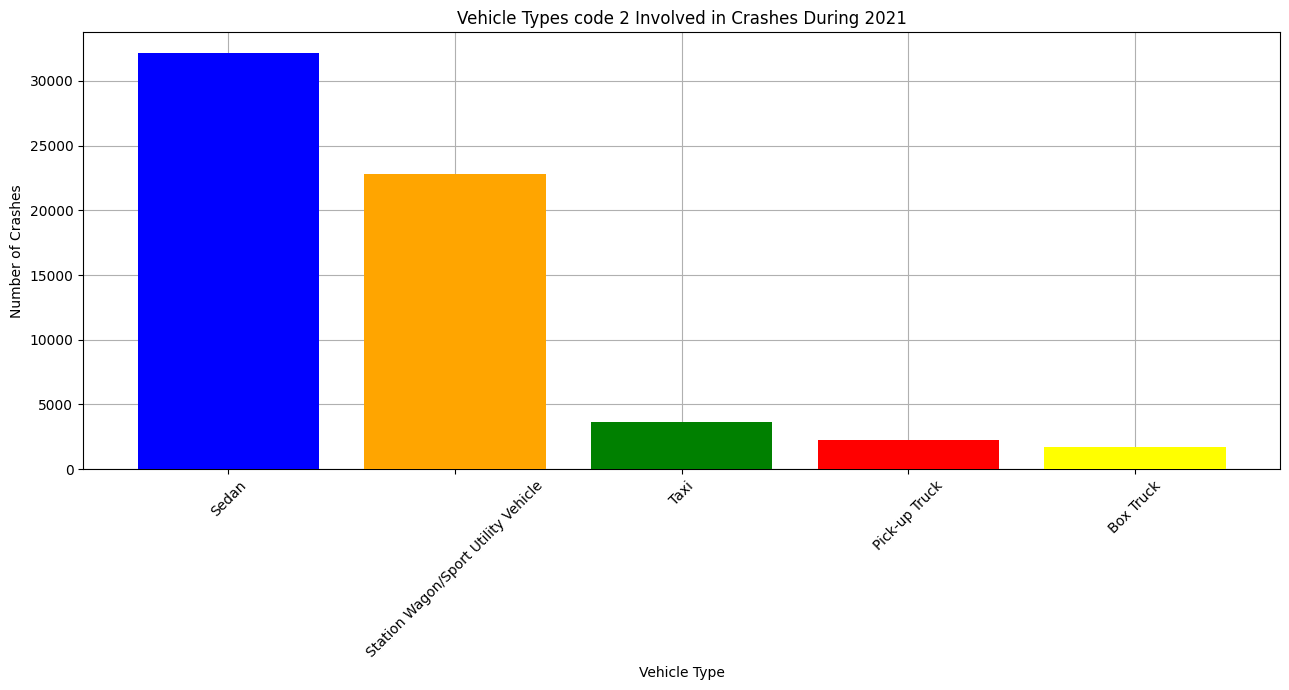

In [ ]:
#Vehicle type 2 data for 2021
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes_20240501.csv')
# Convert 'CRASH DATE' to datetime
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])

df_2021 = df[df['CRASH DATE'].dt.year == 2021]

vehicle_counts_2021 = df_2021['VEHICLE TYPE CODE 2'].value_counts()

# Prepare data for plotting
vehicles = ['Sedan', 'Station Wagon/Sport Utility Vehicle', 'Taxi', 'Pick-up Truck', 'Box Truck']
counts = [32141, 22777, 3626, 2256, 1744]
colors = ['blue', 'orange', 'green', 'red', 'yellow']

# bar plot
plt.figure(figsize=(13, 7))
plt.bar(vehicles, counts, color=colors, zorder=3)
plt.title('Vehicle Types code2 Involved in Crashes During 2021')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Crashes')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout() 

# Show the plot
plt.show()

                                                                                    Lets see how the data looks on a map 

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

!! Imageio is needed to fun the map functions !!

In [ ]:
#Library for map graphic 
!pip install imageio==2.34.1


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


# Collision Hotspots 2019-2021

/tmp/ipykernel_1438/3867155127.py:6: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("Motor_Vehicle_Collisions_-_Crashes_20240501.csv")
/tmp/ipykernel_1438/3867155127.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  basemap = imageio.imread("New-York-City-boundary-map.png")


<function matplotlib.pyplot.show(close=None, block=None)>

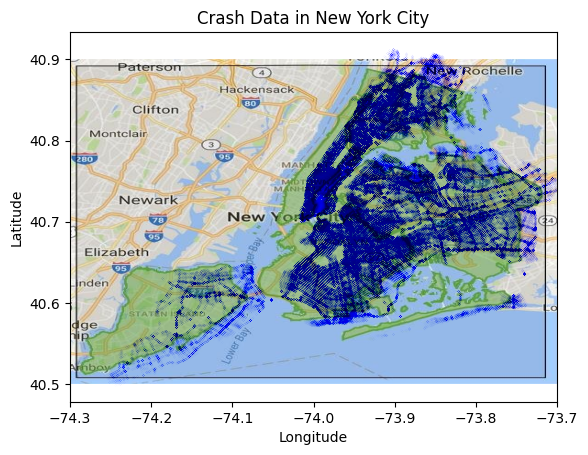

In [ ]:
import matplotlib.pyplot as plt
import imageio
import pandas as pd


# Load the CSV data into a pandas DataFrame
data = pd.read_csv("Motor_Vehicle_Collisions_-_Crashes_20240501.csv")

# Filter out any NaN values
data = data.dropna(subset=['LATITUDE', 'LONGITUDE'])

# Apply latitude and longitude filtering
data = data[(data['LATITUDE'] >= 40) & (data['LATITUDE'] <= 41)]
data = data[(data['LONGITUDE'] >= -74.3) & (data['LONGITUDE'] <= -73.7)]

# Load a basemap image of New York City
basemap = imageio.imread("New-York-City-boundary-map.png")

# Plot the basemap image
plt.imshow(basemap, extent=[-74.3, -73.7, 40.5, 40.9])
colors = ['blue']
ALPHA = 0.5
# Plot crash data as points on the basemap
plt.scatter(data['LONGITUDE'], data['LATITUDE'], color=colors, s=0.00001, alpha =ALPHA)

# Set plot title and labels
plt.title("Crash Data in New York City")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show the plot
plt.show

# Year Specific Collision Hotspots 

- improved visibility on dot size   (s=0.00005 --> 0.0005)

2019 Hotspots


/tmp/ipykernel_34/3181797736.py:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("Motor_Vehicle_Collisions_-_Crashes_20240501.csv")
/tmp/ipykernel_34/3181797736.py:17: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  basemap = imageio.imread("New-York-City-boundary-map.png")


<function matplotlib.pyplot.show(close=None, block=None)>

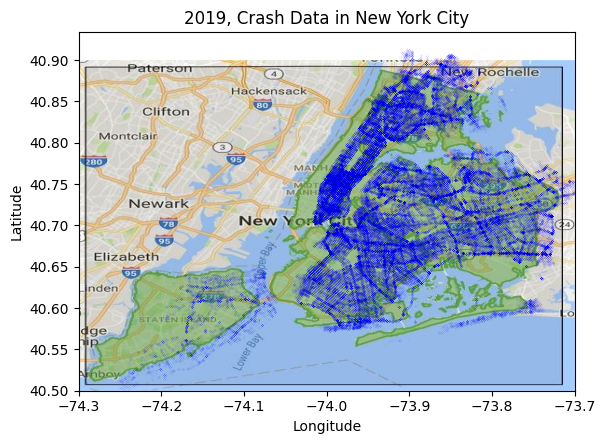

In [ ]:
import matplotlib.pyplot as plt
import imageio
import pandas as pd


# Load the CSV data into a pandas DataFrame
data = pd.read_csv("Motor_Vehicle_Collisions_-_Crashes_20240501.csv")

# Filter out any NaN values
df2019 = df2019.dropna(subset=['LATITUDE', 'LONGITUDE'])

# Apply latitude and longitude filtering
data = df2019[(df2019['LATITUDE'] >= 40) & (df2019['LATITUDE'] <= 41)]
data = df2019[(df2019['LONGITUDE'] >= -74.3) & (df2019['LONGITUDE'] <= -73.7)]

# Load a basemap image of New York City
basemap = imageio.imread("New-York-City-boundary-map.png")

# Plot the basemap image
plt.imshow(basemap, extent=[-74.3, -73.7, 40.5, 40.9])
colors = ['blue']
ALPHA = 1
# Plot crash data as points on the basemap
plt.scatter(data['LONGITUDE'], data['LATITUDE'], color=colors, s=0.0005, alpha =ALPHA)

# Set plot title and labels
plt.title("2019, Crash Data in New York City")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show the plot
plt.show

2020 Hotspots

/tmp/ipykernel_34/1338135436.py:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("Motor_Vehicle_Collisions_-_Crashes_20240501.csv")
/tmp/ipykernel_34/1338135436.py:17: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  basemap = imageio.imread("New-York-City-boundary-map.png")


<function matplotlib.pyplot.show(close=None, block=None)>

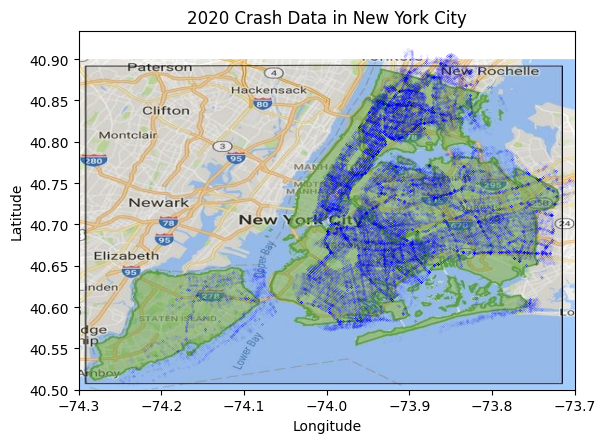

In [ ]:
import matplotlib.pyplot as plt
import imageio
import pandas as pd


# Load the CSV data into a pandas DataFrame
data = pd.read_csv("Motor_Vehicle_Collisions_-_Crashes_20240501.csv")

# Filter out any NaN values
df2020 = df2020.dropna(subset=['LATITUDE', 'LONGITUDE'])

# Apply latitude and longitude filtering
data = df2020[(df2020['LATITUDE'] >= 40) & (df2020['LATITUDE'] <= 41)]
data = df2020[(df2020['LONGITUDE'] >= -74.3) & (df2020['LONGITUDE'] <= -73.7)]

# Load a basemap image of New York City
basemap = imageio.imread("New-York-City-boundary-map.png")

# Plot the basemap image
plt.imshow(basemap, extent=[-74.3, -73.7, 40.5, 40.9])
colors = ['blue']
ALPHA = 1
# Plot crash data as points on the basemap
plt.scatter(data['LONGITUDE'], data['LATITUDE'], color=colors, s=0.0005, alpha =ALPHA)

# Set plot title and labels
plt.title("2020 Crash Data in New York City")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show the plot
plt.show

 2021 Hotspots

/tmp/ipykernel_34/3191731363.py:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("Motor_Vehicle_Collisions_-_Crashes_20240501.csv")
/tmp/ipykernel_34/3191731363.py:17: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  basemap = imageio.imread("New-York-City-boundary-map.png")


<function matplotlib.pyplot.show(close=None, block=None)>

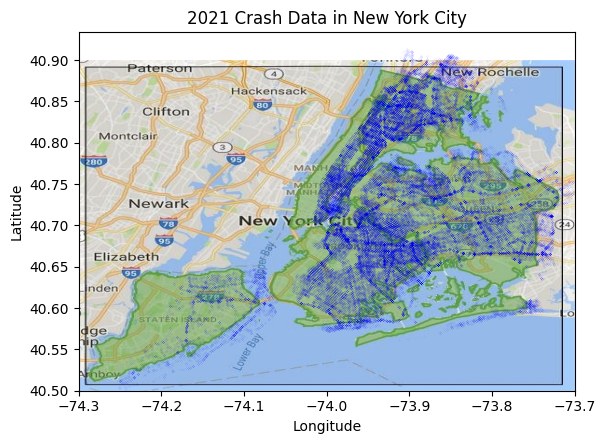

In [ ]:
import matplotlib.pyplot as plt
import imageio
import pandas as pd


# Load the CSV data into a pandas DataFrame
data = pd.read_csv("Motor_Vehicle_Collisions_-_Crashes_20240501.csv")

# Filter out any NaN values
df2021 = df2021.dropna(subset=['LATITUDE', 'LONGITUDE'])

# Apply latitude and longitude filtering
data = df2021[(df2021['LATITUDE'] >= 40) & (df2021['LATITUDE'] <= 41)]
data = df2021[(df2021['LONGITUDE'] >= -74.3) & (df2021['LONGITUDE'] <= -73.7)]

# Load a basemap image of New York City
basemap = imageio.imread("New-York-City-boundary-map.png")

# Plot the basemap image
plt.imshow(basemap, extent=[-74.3, -73.7, 40.5, 40.9])
colors = ['blue']
ALPHA = 1
# Plot crash data as points on the basemap
plt.scatter(data['LONGITUDE'], data['LATITUDE'], color=colors, s=0.0005, alpha =ALPHA)

# Set plot title and labels
plt.title("2021 Crash Data in New York City")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show the plot
plt.show

It is evident that there has been a substantial reduction in opacity, which is directly correlated with the drop in accidents. The year 2019 had a significant increase in the number of collisions throughout the boroughs, which is likely the reason for the general bright appearance of the overall map. 

One observation I made is that Manhattan has the lowest number of accidents among the boroughs. This is evident from the drop in the number of blue dots in Manhattan in 2020 and 2021 compared to 2019.


# Conclusion

### Borough Specific Data and Analysis


Upon normalization and aggregation of collision totals across boroughs, the initial part of our hypothesis was confirmed. In 2019, there were 137,024 recorded collisions, nearly double the number observed in both 2020 and 2021. Specifically, 2020 saw 73,688 collisions, while 2021 recorded 72,217 collisions. This outcome was unexpected, as we had anticipated a greater reduction in collisions during the lockdown year. The slight discrepancy of approximately 500 collisions between 2020 and 2021 may be attributed to various factors, including New Yorkers' gradual adjustment to pre-pandemic routines. We had anticipated 2021 to exhibit a more pronounced decrease in collision rates, but this did not materialize.

Examining borough-specific data, we observe consistent patterns. Brooklyn consistently reported the highest number of collisions, accounting for 30% of all collisions between 2019 and 2021. Queens followed closely behind with 26%, a trend that aligns with its position intersecting major roads in Brooklyn, the primary collision hotspot. Manhattan accounted for 22% of collisions, while the Bronx and Staten Island reported 14% and 4%, respectively.

Notably, there was a shift in collision percentages between the Bronx and Manhattan in 2020 and 2021. In 2020, the Bronx surpassed Manhattan in collisions by a margin of 5%, with this margin narrowing to 3% in 2021. This change can be attributed to the stricter enforcement of lockdown measures in Manhattan, resulting in road closures that limited traffic flow. Conversely, the Bronx remained connected to major expressways and roads, potentially contributing to its higher collision rate during the lockdown. As restrictions eased, collision rates between the two boroughs began to converge in 2021.

In summary, the COVID-19 pandemic had a discernible impact on collision rates in New York City, with collisions halving during the lockdown period, ultimately contributing to safer streets within the city.

### Demographics and Timeline Analysis

After compiling data from each individual year, we analyze the trends in collision rates and associated casualties over our timeline. Specifically focusing on fatalities, we observed a consistent rise from 244 in 2019 to 269 in 2020, and further to 296 in 2021. Notably, however, we observed a deviation in the number of injuries in 2020, with 44,614 reported incidents—significantly fewer than the 61,389 recorded in 2019 and the 51,781 in 2021. While fatalities remained relatively consistent with expectations in 2020, the total number of injuries decreased compared to the years preceding and following.

### Crash Time Data Analysis  

Upon first inspection, the data seems to be mostly normal. Upon careful examination, one may see a noticeable increase in the number of collisions in 2019 compared to previous years. The peak value in 2019 was 14000, however in 2020 and 2021 it decreased by half, settling at 7000. It is intriguing to see the correlation between the time of day and the severity of the accidents. Based on the data, it seems that the period between 4pm (16:00 in military time) has the greatest probability of crashes occurring, while the period around 3am(3:00 military time) has the lowest probability of collisions.

### Vehicle Crash Types 

The data indicates that sedans and station wagons/sport utility vehicles are the most common vehicle types involved in collisions, which suggests that these cars are widely used on the roadways. In addition, there was a notable decrease in collisions for every vehicle category mentioned between 2019 and 2020. This could be attributed to factors like pandemic-related lockdowns, changes to traffic patterns, or advancements in car technology and road safety. Finally, the introduction of E-Bikes in the "VEHICLE TYPE CODE 2" category in 2021 shows a growing variety in the sorts of vehicles used, which may have been prompted by changes in urban infrastructure or a rise in environmental consciousness.

### Year Specific Collision Hotspots 

It is evident that there has been a substantial reduction in opacity, which is directly correlated with the drop in accidents. The year 2019 had a significant increase in the number of collisions throughout the boroughs, which is likely the reason for the general bright appearance of the overall map. One observation made is that Manhattan has the lowest number of accidents among the boroughs. This is evident from the drop in the number of blue dots in Manhattan in 2020 and 2021 compared to 2019.

## Notes: